In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [4]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf['training_params']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['training_params']['data_dir'],
     default_conf['training_params']['extension'],
    default_conf['training_params']['data_file'])

## Generating a dataset

In [6]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 2.7519123554229736
 Validation loss after 0 equals 2.5973100662231445


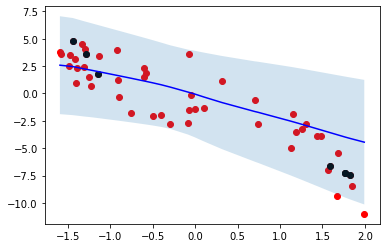

  1%|          | 97/10000 [00:02<03:56, 41.93it/s]

Mean loss at epoch 100 : 2.7045135498046875
 Validation loss after 100 equals 2.6732319593429565


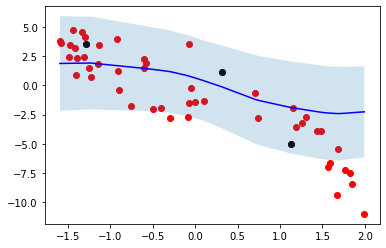

  2%|▏         | 200/10000 [00:05<03:45, 43.43it/s]

Mean loss at epoch 200 : 2.6488091945648193
 Validation loss after 200 equals 2.5319771766662598


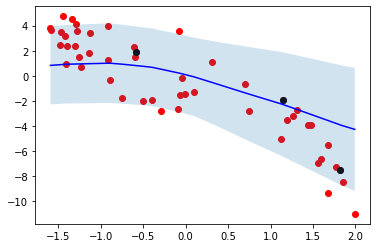

  3%|▎         | 298/10000 [00:07<03:54, 41.34it/s]

Mean loss at epoch 300 : 2.8225324153900146
 Validation loss after 300 equals 2.5620522499084473


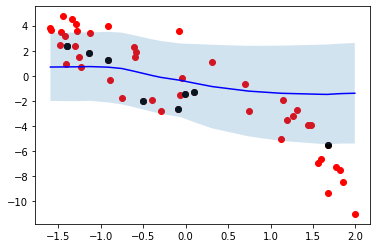

  4%|▍         | 397/10000 [00:10<04:20, 36.85it/s]

Mean loss at epoch 400 : 2.775376319885254
 Validation loss after 400 equals 2.7128477096557617


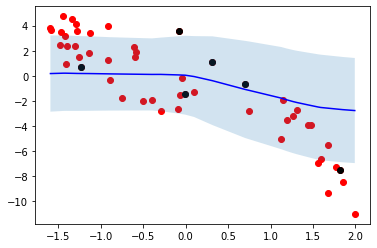

  5%|▍         | 497/10000 [00:13<03:50, 41.17it/s]

Mean loss at epoch 500 : 2.562314987182617
 Validation loss after 500 equals 2.5671801567077637


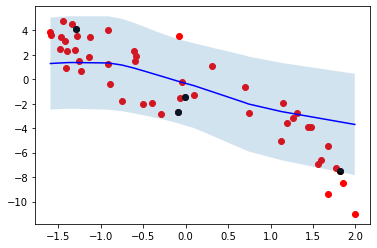

  6%|▌         | 596/10000 [00:17<03:45, 41.72it/s]

Mean loss at epoch 600 : 2.5376858711242676
 Validation loss after 600 equals 2.6552178859710693


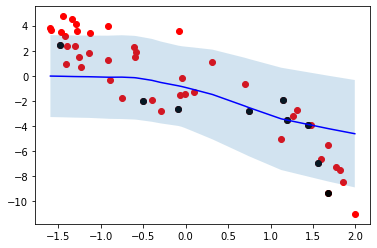

  7%|▋         | 700/10000 [00:19<03:38, 42.58it/s]

Mean loss at epoch 700 : 2.641585350036621
 Validation loss after 700 equals 2.6074072122573853


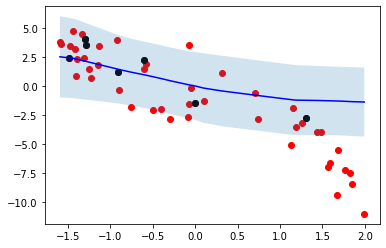

  8%|▊         | 799/10000 [00:22<03:34, 42.80it/s]

Mean loss at epoch 800 : 2.6772241592407227
 Validation loss after 800 equals 2.5288660526275635


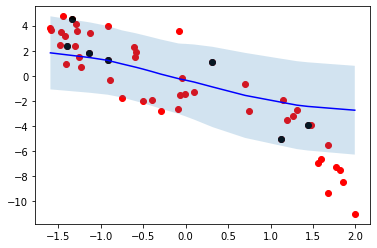

  9%|▉         | 899/10000 [00:25<03:35, 42.31it/s]

Mean loss at epoch 900 : 2.9779083728790283
 Validation loss after 900 equals 2.6900378465652466


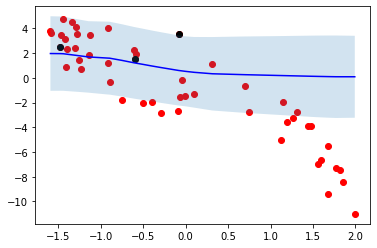

 10%|▉         | 998/10000 [00:27<03:36, 41.66it/s]

Mean loss at epoch 1000 : 2.6334269046783447
 Validation loss after 1000 equals 2.826186180114746


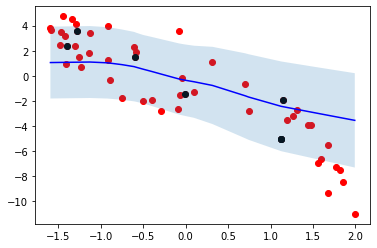

 11%|█         | 1098/10000 [00:30<03:32, 41.80it/s]

Mean loss at epoch 1100 : 2.843702793121338
 Validation loss after 1100 equals 2.767580986022949


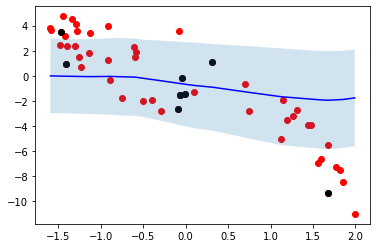

 12%|█▏        | 1198/10000 [00:32<03:29, 41.97it/s]

Mean loss at epoch 1200 : 2.6844656467437744
 Validation loss after 1200 equals 2.7562626600265503


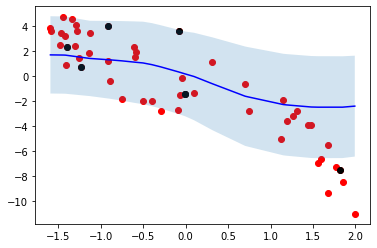

 13%|█▎        | 1296/10000 [00:35<03:30, 41.41it/s]

Mean loss at epoch 1300 : 2.797206163406372
 Validation loss after 1300 equals 2.584988832473755


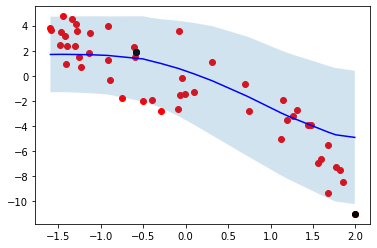

 14%|█▍        | 1398/10000 [00:37<03:40, 39.05it/s]

Mean loss at epoch 1400 : 2.645008087158203
 Validation loss after 1400 equals 2.6620534658432007


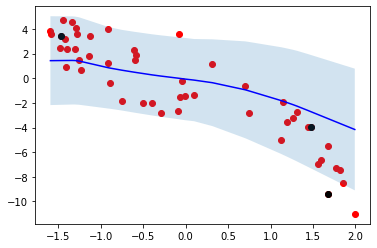

 15%|█▍        | 1499/10000 [00:40<04:06, 34.48it/s]

Mean loss at epoch 1500 : 2.560108184814453
 Validation loss after 1500 equals 2.910565137863159


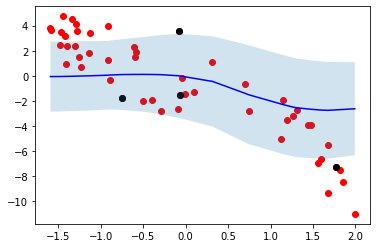

 15%|█▌        | 1502/10000 [00:41<03:53, 36.41it/s]


KeyboardInterrupt: 

In [22]:
model_weights = trainer.run_training(
    data_path=default_conf['training_params']['data_path'],
    target_col=default_conf['training_params']['target_col'],
    train_share=default_conf['training_params']['train_share'],
    num_instances_train=None,
    num_instances_vali=None,
    noise=None,
    length_scale=None,
    gamma=None,
    batch_size_train=default_conf['training_params']['batch_size_train'],
    batch_size_vali=default_conf['training_params']['batch_size_vali'],
    plotting=default_conf['training_params']['plotting']
)

